In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
url = "https://www.exchange-rates.org/precious-metals/gold-price/india/2024"

<!DOCTYPE html>

<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang="en"><!--<![endif]-->
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start': new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0], j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src= 'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f); })(window,document,'script','dataLayer','GTM-NBHNFXMJ');</script>
<!-- End Google Tag Manager -->
<title>Gold Price History India 2024: INR Gold Prices</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
<meta charset="utf-8"><meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<base href="https://www.exchange-rates.org/"/>
<meta content="Explore India gold price histor
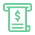
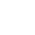

In [13]:
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
soup

In [22]:
tables = soup.findAll("table", attrs={"class": "wide-table"})
tables

[<table class="metal-history-table wide-table">
 <tbody>
 <tr class="month-row">
 <th class="month-header" colspan="6">January 2024</th>
 </tr>
 <tr class="header-row"><th></th><th class="rate" data-g-header='Gold Price
 &lt;span class="karat-caption"&gt;(24 Karat)&lt;/span&gt;' data-kg-header='Gold Price
 &lt;span class="karat-caption"&gt;(24 Karat)&lt;/span&gt;'>Gold Price
 <span class="karat-caption">(24 Karat)</span></th><th class="rate" data-g-header='Gold Price
 &lt;span class="karat-caption"&gt;(22 Karat)&lt;/span&gt;' data-kg-header='Gold Price
 &lt;span class="karat-caption"&gt;(22 Karat)&lt;/span&gt;'>Gold Price
 <span class="karat-caption">(22 Karat)</span></th><th class="rate" data-g-header='Gold Price
 &lt;span class="karat-caption"&gt;(18 Karat)&lt;/span&gt;' data-kg-header='Gold Price
 &lt;span class="karat-caption"&gt;(18 Karat)&lt;/span&gt;'>Gold Price
 <span class="karat-caption">(18 Karat)</span></th><th class="rate" data-g-header='Gold Price
 &lt;span class="karat-c

In [23]:
# Step 3: Extract tables and add the corresponding month from the preceding <th> tag
combined_data = []

In [28]:
for table in tables:
    # Get month name
    month_header = table.find_previous("th", class_="month-header")
    month_name = month_header.text.strip() if month_header else "Unknown"

    # Read the table
    df = pd.read_html(str(table))[0]

    # Flatten MultiIndex if needed
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = [' '.join(col).strip() for col in df.columns.values]

    # Add month column
    df["Month"] = month_name
    combined_data.append(df)

C:\Users\Ajith G\AppData\Local\Temp\ipykernel_15416\1415397872.py:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [29]:
combined_data

[                                          January 2024  \
                                     Unnamed: 0_level_1   
 0                                                1 Jan   
 1                                                2 Jan   
 2                                                3 Jan   
 3                                                4 Jan   
 4                                                5 Jan   
 ..                                                 ...   
 303                                             27 Dec   
 304                                             30 Dec   
 305                                             31 Dec   
 306  Lowest gold price in India in December 2024: ₹...   
 307                                                NaN   
 
                                                         \
                                  Gold Price (24 Karat)   
 0                                             ₹171,905   
 1                                             ₹171,46

In [30]:
final_df = pd.concat(combined_data, ignore_index=True)

In [31]:
# Step 5: Save to CSV and Excel
final_df.to_csv("India_Gold_Price_2024.csv", index=False)
final_df.to_excel("India_Gold_Price_2024.xlsx", index=False)

print("✅ Data successfully saved as CSV and Excel.")

✅ Data successfully saved as CSV and Excel.


In [32]:
price_columns = {
    "Gold Price (24 Karat)": "gold_24k.csv",
    "Gold Price (22 Karat)": "gold_22k.csv",
    "Gold Price (18 Karat)": "gold_18k.csv",
    "Gold Price (14 Karat)": "gold_14k.csv",
    "Gold Price (10 Karat)": "gold_10k.csv"
}

In [38]:
# Flatten MultiIndex columns if present and clean column names
final_df.columns = [' '.join(col).strip() if isinstance(col, tuple) else col.strip() for col in final_df.columns]


In [40]:
final_df.columns

Index(['January 2024 Unnamed: 0_level_1', 'January 2024 Gold Price (24 Karat)',
       'January 2024 Gold Price (22 Karat)',
       'January 2024 Gold Price (18 Karat)',
       'January 2024 Gold Price (14 Karat)',
       'January 2024 Gold Price (10 Karat)', 'Month',
       'January 2024 Unnamed: 0_level_1', 'January 2024 Gold Price (24 Karat)',
       'January 2024 Gold Price (22 Karat)',
       'January 2024 Gold Price (18 Karat)',
       'January 2024 Gold Price (14 Karat)',
       'January 2024 Gold Price (10 Karat)', 'Month'],
      dtype='object')

In [39]:
for col_name, file_name in price_columns.items():
    if col_name in final_df.columns:
        df_out = final_df[["Month", final_df.columns[0], col_name]].copy()  # columns: Month, Date, Karat Price

        # Clean ₹ and commas and convert to numeric
        df_out[col_name] = df_out[col_name].replace('[₹,]', '', regex=True).astype(float)
        print(df_out)

        # Save to CSV
        df_out.to_csv(file_name, index=False)

In [35]:
print("✅ All gold karat files saved separately:")
for f in price_columns.values():
    print(f" - {f}")

✅ All gold karat files saved separately:
 - gold_24k.csv
 - gold_22k.csv
 - gold_18k.csv
 - gold_14k.csv
 - gold_10k.csv
